# K-Means clustering

In this lesson, you will learn how to create clusters using Scikit-learn and the Nigerian music dataset you imported earlier. We will cover the basics of K-Means for Clustering. Keep in mind that, as you learned in the earlier lesson, there are many ways to work with clusters and the method you use depends on your data. We will try K-Means as it's the most common clustering technique. Let's get started!

Terms you will learn about:

1. Silhouette scoring
2. Elbow method
3. Inertia
4. Variance

## Introduction
K-Means Clustering is a method derived from the domain of signal processing. It is used to divide and partition groups of data into 'k' clusters using a series of observations. Each observation works to group a given datapoint closest to its nearest 'mean', or the center point of a cluster.

The clusters can be visualized as Voronoi diagrams, which include a point (or 'seed') and its corresponding region.

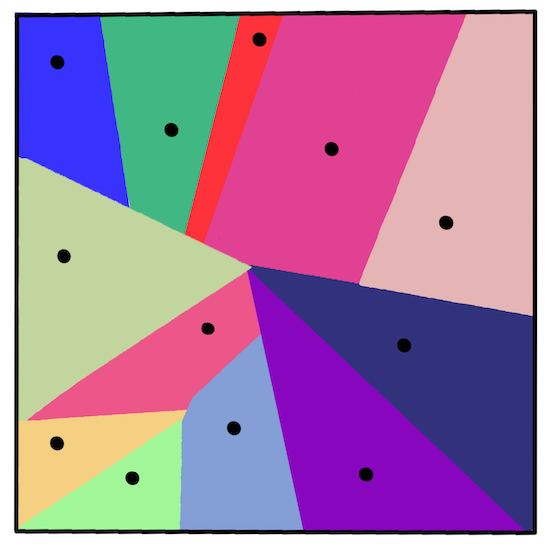

The K-Means clustering process executes in a three-step process:

The algorithm selects k-number of center points by sampling from the dataset. After this, it loops:
i. It assigns each sample to the nearest centroid.
ii. It creates new centroids by taking the mean value of all of the samples assigned to the previous centroids.
iii. Then, it calculates the difference between the new and old centroids and repeats until the centroids are stabilized.


One drawback of using K-Means includes the fact that you will need to establish 'k', that is the number of centroids. Fortunately the 'elbow method' helps to estimate a good starting value for 'k'. You'll try it in a minute.

## Data import and preliminary cleaning

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv("data/nigerian-songs.csv")
df.head()

,name,album,artist,artist_top_genre,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature
0,Sparky,Mandy & The Jungle,Cruel Santino,alternative r&b,2019,144000,48,0.666,0.8510,0.420,0.534000,0.1100,-6.699,0.0829,133.015,5
1,shuga rush,EVERYTHING YOU HEARD IS TRUE,Odunsi (The Engine),afropop,2020,89488,30,0.710,0.0822,0.683,0.000169,0.1010,-5.640,0.3600,129.993,3
2,LITT!,LITT!,AYLØ,indie r&b,2018,207758,40,0.836,0.2720,0.564,0.000537,0.1100,-7.127,0.0424,130.005,4
3,Confident / Feeling Cool,Enjoy Your Life,Lady Donli,nigerian pop,2019,175135,14,0.894,0.7980,0.611,0.000187,0.0964,-4.961,0.1130,111.087,4
4,wanted you,rare.,Odunsi (The Engine),afropop,2018,152049,25,0.702,0.1160,0.833,0.910000,0.3480,-6.044,0.0447,105.115,4


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 530 entries, 0 to 529
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              530 non-null    object 
 1   album             530 non-null    object 
 2   artist            530 non-null    object 
 3   artist_top_genre  530 non-null    object 
 4   release_date      530 non-null    int64  
 5   length            530 non-null    int64  
 6   popularity        530 non-null    int64  
 7   danceability      530 non-null    float64
 8   acousticness      530 non-null    float64
 9   energy            530 non-null    float64
 10  instrumentalness  530 non-null    float64
 11  liveness          530 non-null    float64
 12  loudness          530 non-null    float64
 13  speechiness       530 non-null    float64
 14  tempo             530 non-null    float64
 15  time_signature    530 non-null    int64  
dtypes: float64(8), int64(4), object(4)
memory us

In [3]:
df.isnull().sum()

name                0
album               0
artist              0
artist_top_genre    0
release_date        0
length              0
popularity          0
danceability        0
acousticness        0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
time_signature      0
dtype: int64

In [4]:
df.describe()

,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature
count,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000
mean,2015.390566,222298.169811,17.507547,0.741619,0.265412,0.760623,0.016305,0.147308,-4.953011,0.130748,116.487864,3.986792
std,3.131688,39696.822259,18.992212,0.117522,0.208342,0.148533,0.090321,0.123588,2.464186,0.092939,23.518601,0.333701
min,1998.000000,89488.000000,0.000000,0.255000,0.000665,0.111000,0.000000,0.028300,-19.362000,0.027800,61.695000,3.000000
25%,2014.000000,199305.000000,0.000000,0.681000,0.089525,0.669000,0.000000,0.075650,-6.298750,0.059100,102.961250,4.000000
50%,2016.000000,218509.000000,13.000000,0.761000,0.220500,0.784500,0.000004,0.103500,-4.558500,0.097950,112.714500,4.000000
75%,2017.000000,242098.500000,31.000000,0.829500,0.403000,0.875750,0.000234,0.164000,-3.331000,0.177000,125.039250,4.000000
max,2020.000000,511738.000000,73.000000,0.966000,0.954000,0.995000,0.910000,0.811000,0.582000,0.514000,206.007000,5.000000


🤔 If we are working with clustering, an unsupervised method that does not require labeled data, why are we showing this data with labels? In the data exploration phase, they come in handy, but they are not necessary for the clustering algorithms to work. You could just as well remove the column headers and refer to the data by column number.

Look at the general values of the data. Note that popularity can be '0', which show songs that have no ranking. Let's remove those shortly.

Use a barplot to find out the most popular genres:

Text(0.5, 1.0, 'Top genres')

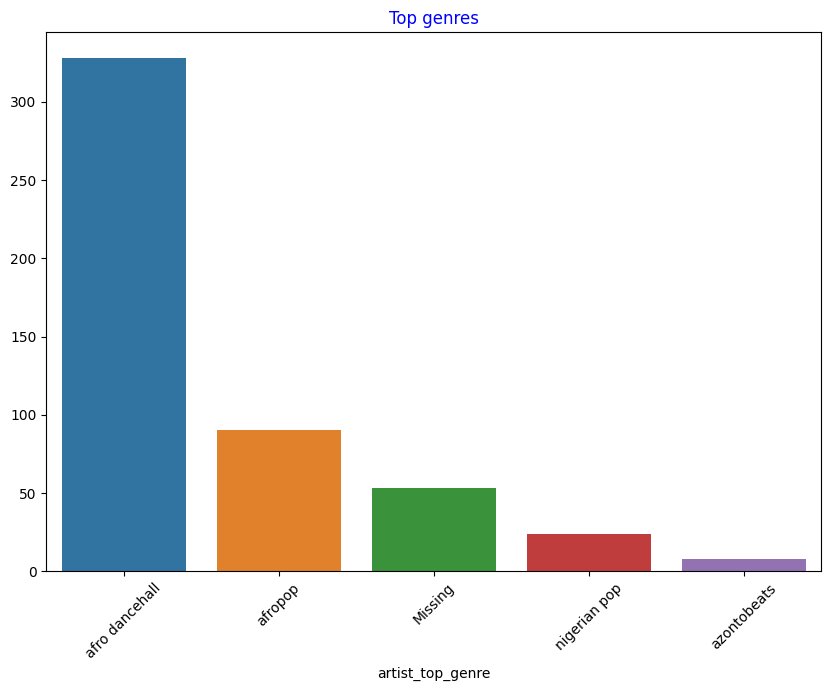

In [6]:
import seaborn as sns

top = df['artist_top_genre'].value_counts()
plt.figure(figsize=(10,7))
sns.barplot(x=top[:5].index,y=top[:5].values)
plt.xticks(rotation=45)
plt.title('Top genres',color = 'blue')

✅ If you'd like to see more top values, change the top [:5] to a bigger value, or remove it to see all.

Note, when the top genre is described as 'Missing', that means that Spotify did not classify it, so let's get rid of it.

Get rid of missing data by filtering it out

Text(0.5, 1.0, 'Top genres')

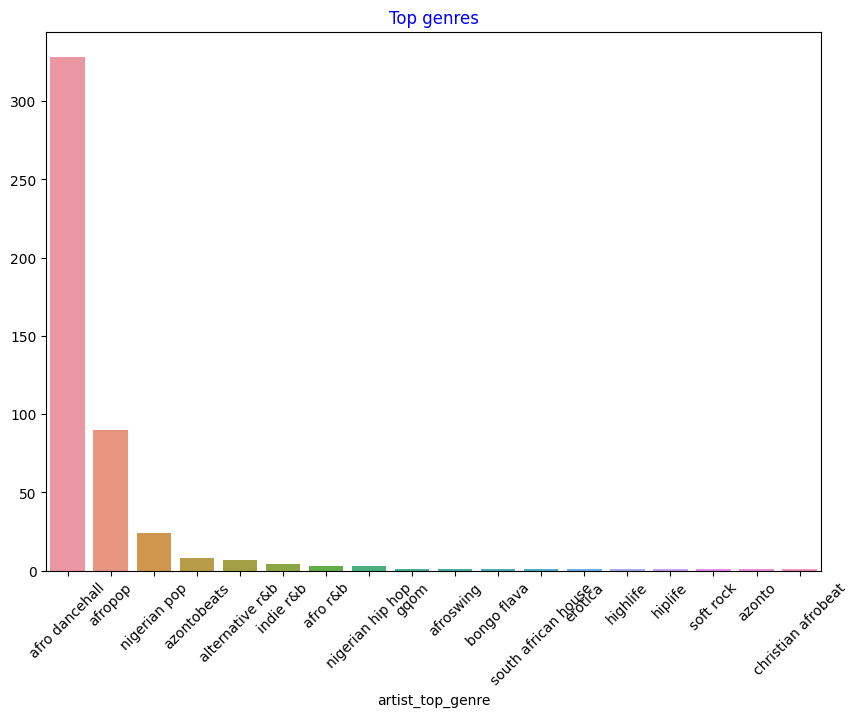

In [7]:
df = df[df['artist_top_genre'] != 'Missing']
top = df['artist_top_genre'].value_counts()
plt.figure(figsize=(10,7))
sns.barplot(x=top.index,y=top.values)
plt.xticks(rotation=45)
plt.title('Top genres',color = 'blue')

By far, the top three genres dominate this dataset. Let's concentrate on afro dancehall, afropop, and nigerian pop, additionally filter the dataset to remove anything with a 0 popularity value (meaning it was not classified with a popularity in the dataset and can be considered noise for our purposes):

Text(0.5, 1.0, 'Top genres')

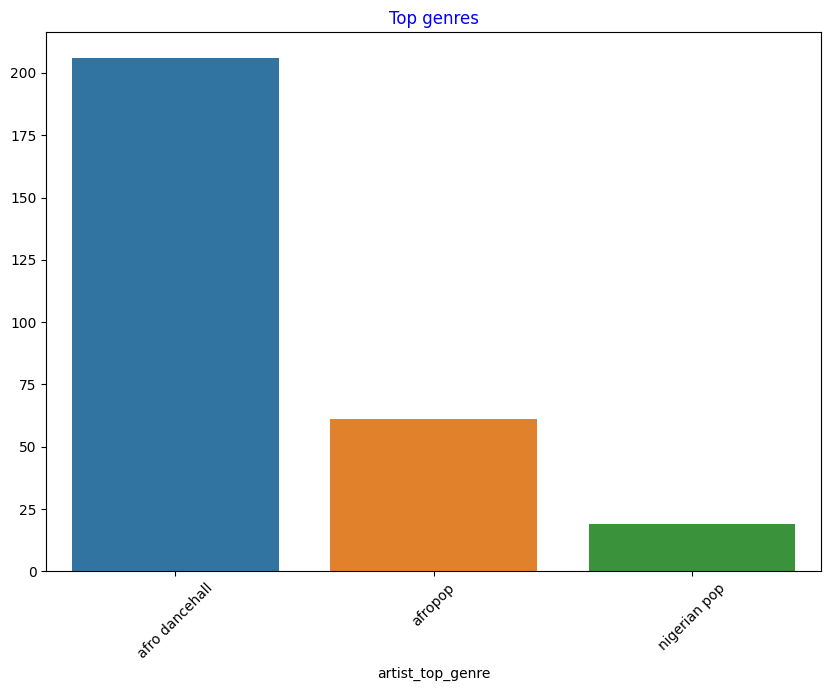

In [8]:
df = df[(df['artist_top_genre'] == 'afro dancehall') | (df['artist_top_genre'] == 'afropop') | (df['artist_top_genre'] == 'nigerian pop')]
df = df[(df['popularity'] > 0)]
top = df['artist_top_genre'].value_counts()
plt.figure(figsize=(10,7))
sns.barplot(x=top.index,y=top.values)
plt.xticks(rotation=45)
plt.title('Top genres',color = 'blue')

In [9]:
df.head()

,name,album,artist,artist_top_genre,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature
1,shuga rush,EVERYTHING YOU HEARD IS TRUE,Odunsi (The Engine),afropop,2020,89488,30,0.710,0.0822,0.683,0.000169,0.1010,-5.640,0.3600,129.993,3
3,Confident / Feeling Cool,Enjoy Your Life,Lady Donli,nigerian pop,2019,175135,14,0.894,0.7980,0.611,0.000187,0.0964,-4.961,0.1130,111.087,4
4,wanted you,rare.,Odunsi (The Engine),afropop,2018,152049,25,0.702,0.1160,0.833,0.910000,0.3480,-6.044,0.0447,105.115,4
5,Kasala,Pioneers,DRB Lasgidi,nigerian pop,2020,184800,26,0.803,0.1270,0.525,0.000007,0.1290,-10.034,0.1970,100.103,4
6,Pull Up,Everything Pretty,prettyboydo,nigerian pop,2018,202648,29,0.818,0.4520,0.587,0.004490,0.5900,-9.840,0.1990,95.842,4


Do a quick test to see if the data correlates in any particularly strong way:

In [10]:
df['name'] = pd.factorize(df['name'])[0]
df['album'] = pd.factorize(df['album'])[0]
df['artist'] = pd.factorize(df['artist'])[0]
df['artist_top_genre'] = pd.factorize(df['artist_top_genre'])[0]

<Axes: >

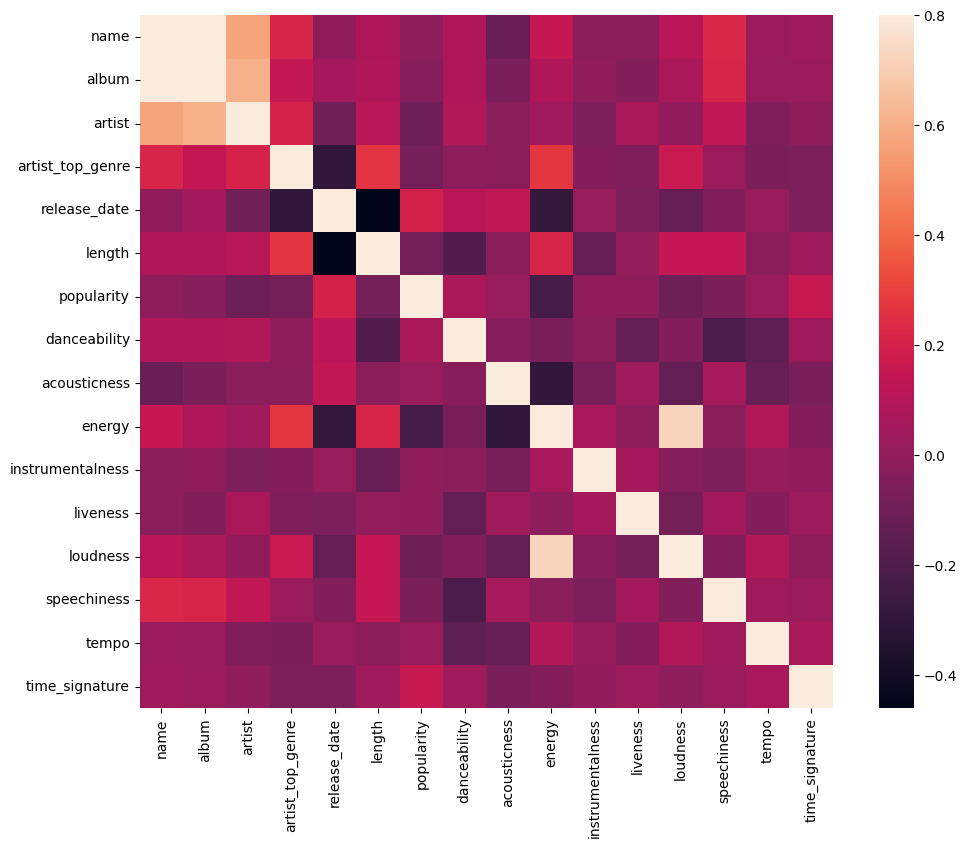

In [11]:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True)

The only strong correlation is between energy and loudness, which is not too surprising, given that loud music is usually pretty energetic. Otherwise, the correlations are relatively weak. It will be interesting to see what a clustering algorithm can make of this data.

🎓 Note that correlation does not imply causation! We have proof of correlation but no proof of causation. An amusing web site has some visuals that emphasize this point.

Is there any convergence in this dataset around a song's perceived popularity and danceability? A FacetGrid shows that there are concentric circles that line up, regardless of genre. Could it be that Nigerian tastes converge at a certain level of danceability for this genre?

✅ Try different datapoints (energy, loudness, speechiness) and more or different musical genres. What can you discover? Take a look at the df.describe() table to see the general spread of the data points.

## Exercise - data distribution
Are these three genres significantly different in the perception of their danceability, based on their popularity?

Examine our top three genres data distribution for popularity and danceability along a given x and y axis.

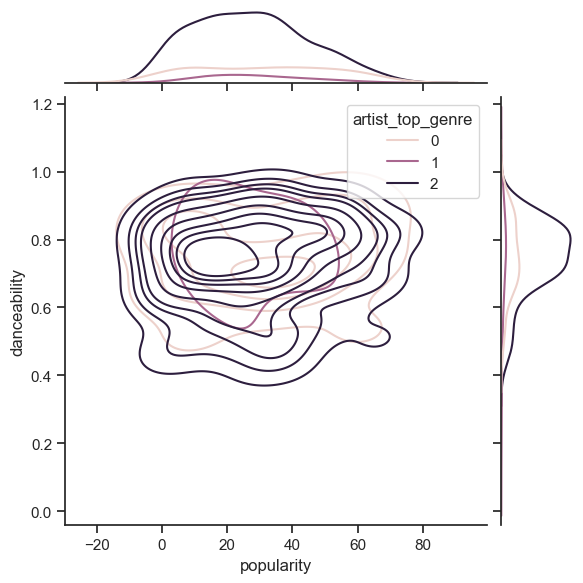

In [12]:
sns.set_theme(style="ticks")

g = sns.jointplot(
    data=df,
    x="popularity", y="danceability", hue="artist_top_genre",
    kind="kde",
)

You can discover concentric circles around a general point of convergence, showing the distribution of points.

🎓 Note that this example uses a KDE (Kernel Density Estimate) graph that represents the data using a continuous probability density curve. This allows us to interpret data when working with multiple distributions.

In general, the three genres align loosely in terms of their popularity and danceability. Determining clusters in this loosely-aligned data will be a challenge:

Create a scatter plot:

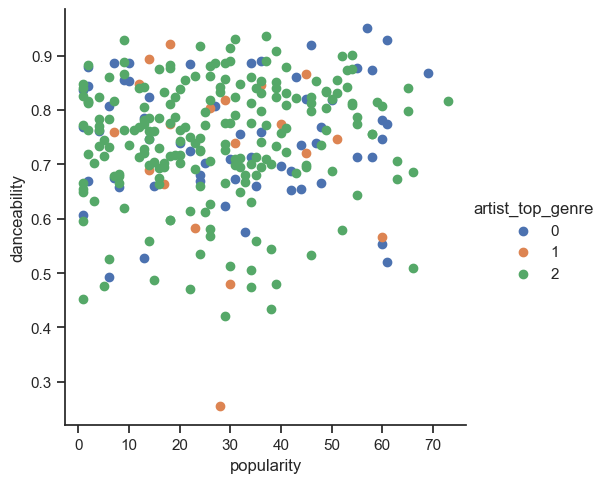

In [13]:
sns.FacetGrid(df, hue="artist_top_genre", height=5) \
   .map(plt.scatter, "popularity", "danceability") \
   .add_legend()

In general, for clustering, you can use scatterplots to show clusters of data, so mastering this type of visualization is very useful. In the next lesson, we will take this filtered data and use k-means clustering to discover groups in this data that see to overlap in interesting ways.

## Exercise - preparation
Start by taking another look at the songs data.

Create a boxplot, calling boxplot() for each column:

<Axes: xlabel='release_date'>

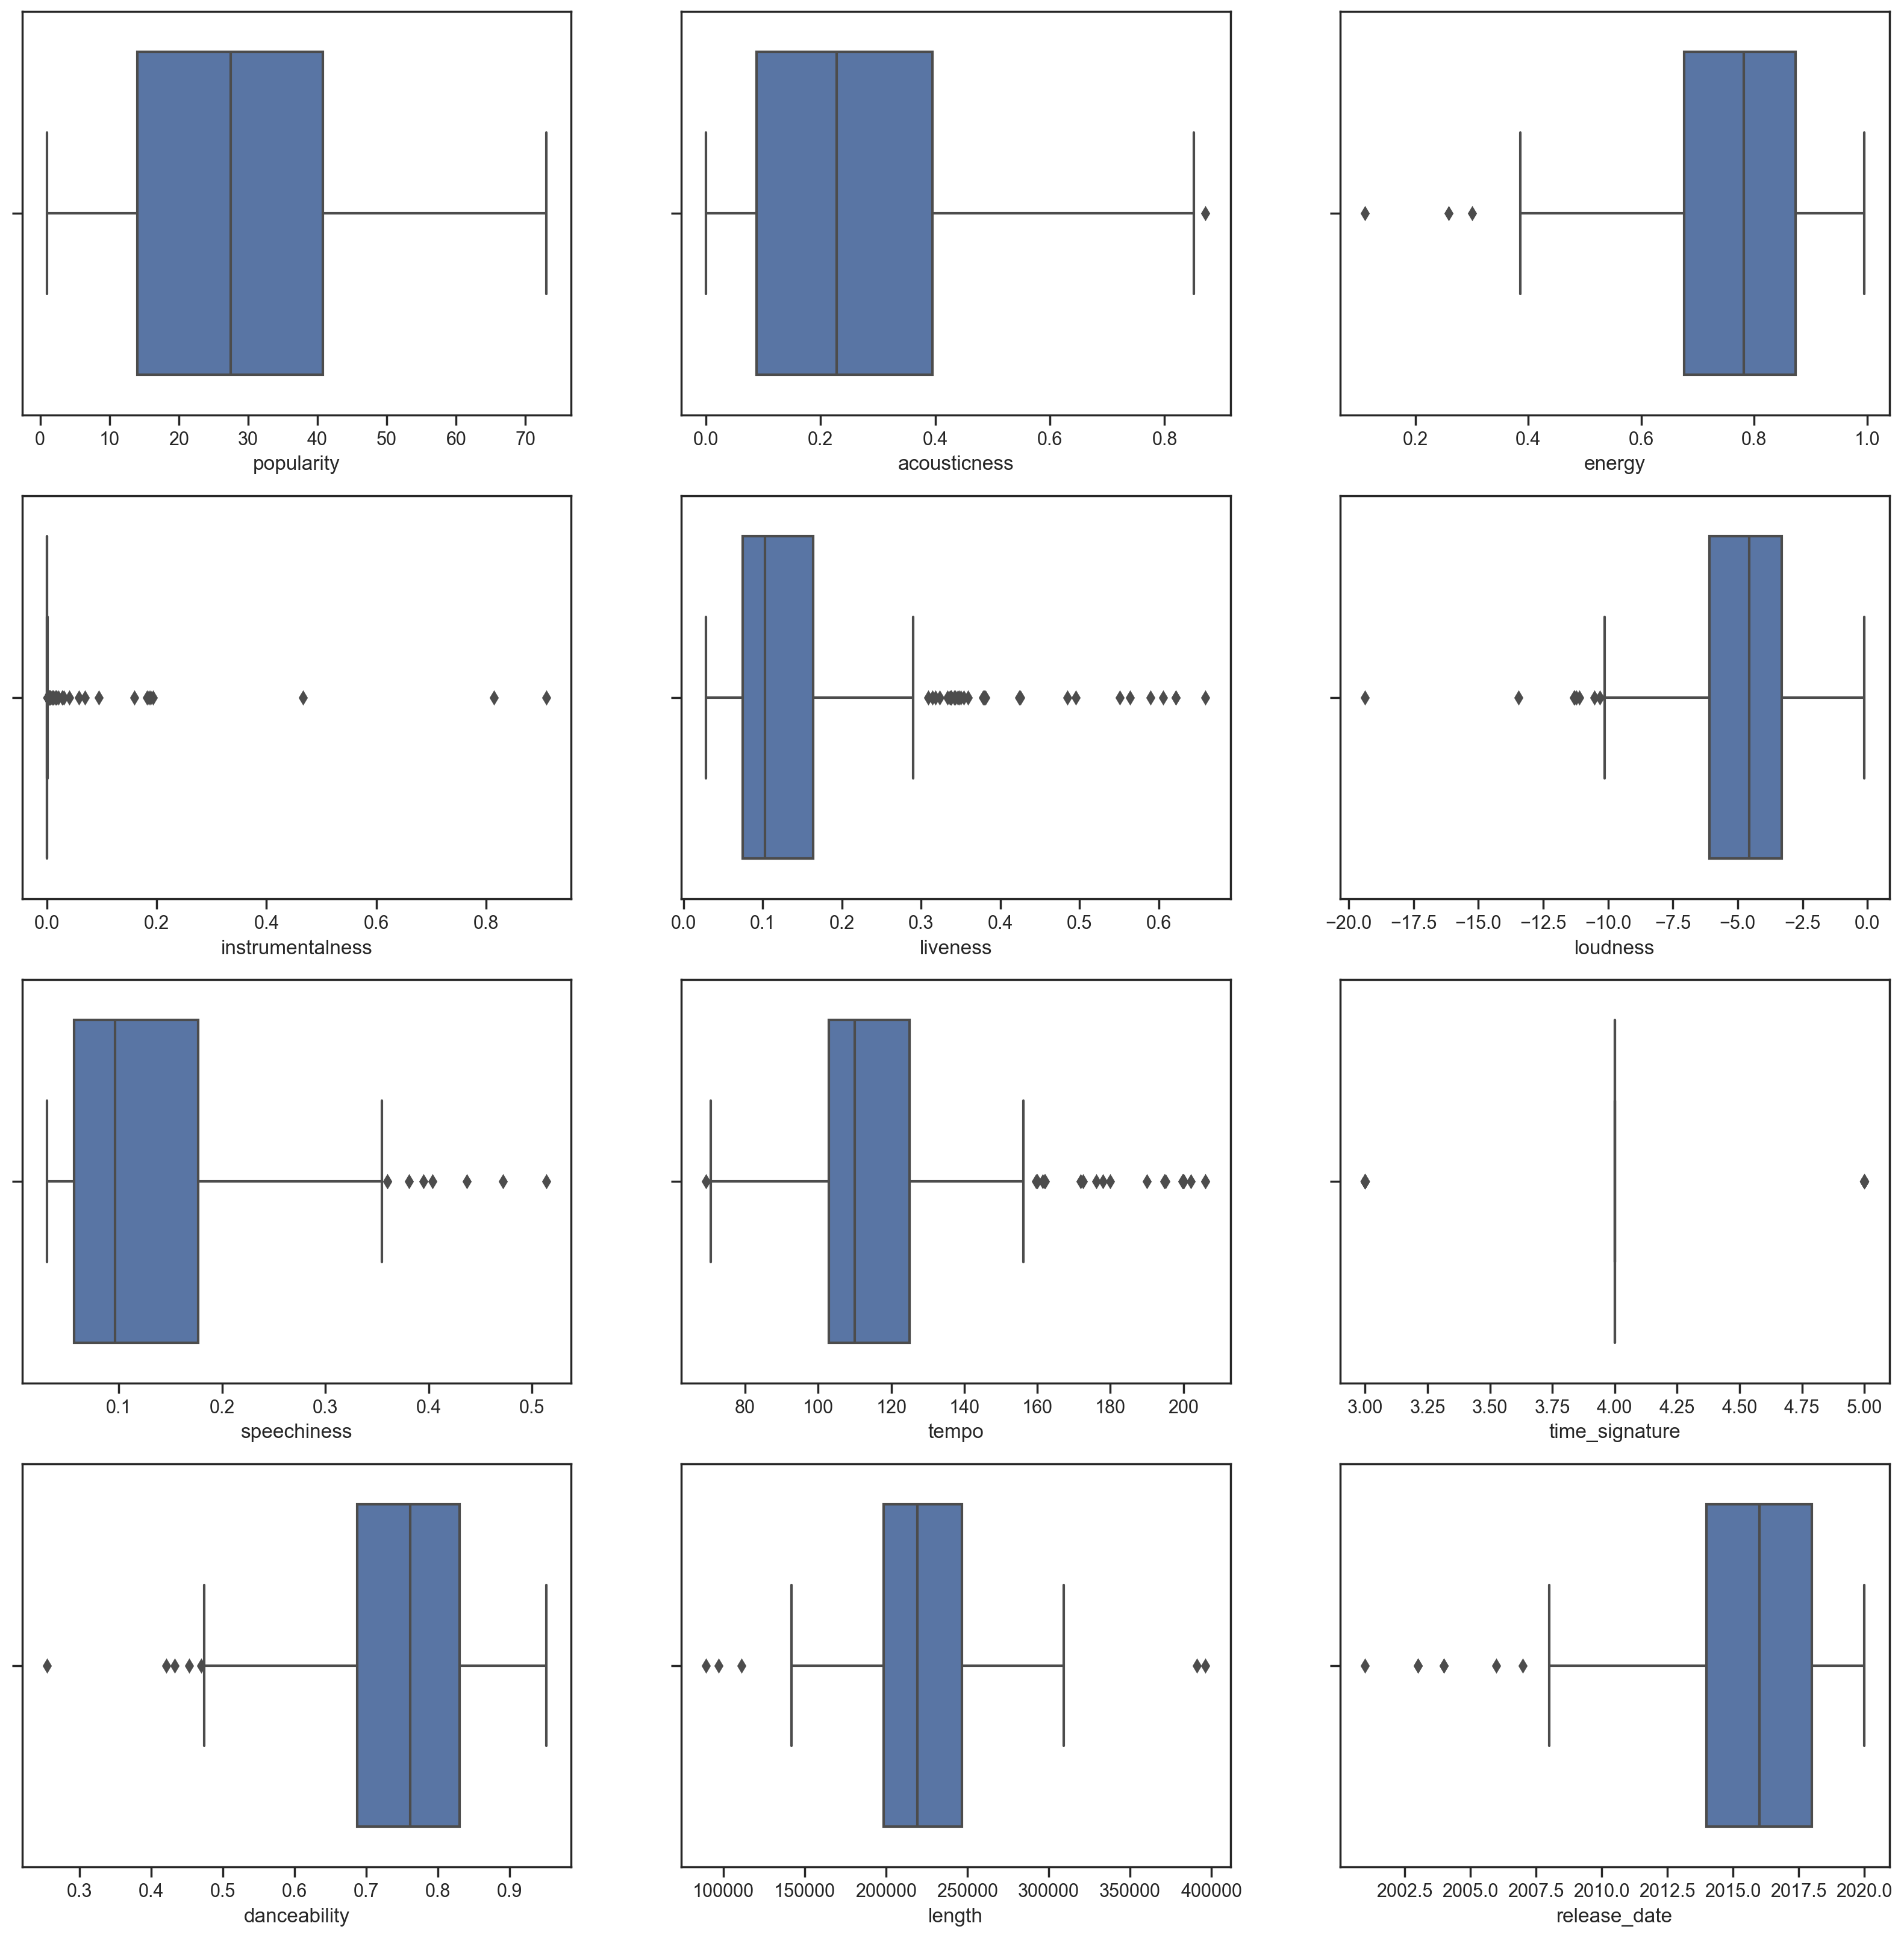

In [14]:
plt.figure(figsize=(20,20), dpi=200)

plt.subplot(4,3,1)
sns.boxplot(x = 'popularity', data = df)

plt.subplot(4,3,2)
sns.boxplot(x = 'acousticness', data = df)

plt.subplot(4,3,3)
sns.boxplot(x = 'energy', data = df)

plt.subplot(4,3,4)
sns.boxplot(x = 'instrumentalness', data = df)

plt.subplot(4,3,5)
sns.boxplot(x = 'liveness', data = df)

plt.subplot(4,3,6)
sns.boxplot(x = 'loudness', data = df)

plt.subplot(4,3,7)
sns.boxplot(x = 'speechiness', data = df)

plt.subplot(4,3,8)
sns.boxplot(x = 'tempo', data = df)

plt.subplot(4,3,9)
sns.boxplot(x = 'time_signature', data = df)

plt.subplot(4,3,10)
sns.boxplot(x = 'danceability', data = df)

plt.subplot(4,3,11)
sns.boxplot(x = 'length', data = df)

plt.subplot(4,3,12)
sns.boxplot(x = 'release_date', data = df)

This data is a little noisy: by observing each column as a boxplot, you can see outliers.

You could go through the dataset and remove these outliers, but that would make the data pretty minimal.

For now, choose which columns you will use for your clustering exercise. Pick ones with similar ranges and encode the artist_top_genre column as numeric data: